In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('/cxldata/datasets/project/ny_stock_prediction/prices-split-adjusted.csv', header = 0)

In [4]:
df.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
df.tail()


,date,symbol,open,close,low,high,volume
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0
851263,2016-12-30,FTV,54.200001,53.630001,53.389999,54.480000,705100.0


In [6]:
df.shape

(851264, 7)

In [7]:
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [8]:
df_yahoo = df[df['symbol']=='YHOO']

In [9]:
df_yahoo.head(10)

,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0
3053,2010-01-11,YHOO,16.770000,16.740000,16.480000,16.830000,16181900.0
3521,2010-01-12,YHOO,16.650000,16.680000,16.600000,16.860001,15672400.0
3989,2010-01-13,YHOO,16.879999,16.900000,16.650000,16.980000,16955600.0
4457,2010-01-14,YHOO,16.809999,17.120001,16.799999,17.230000,16715600.0
4925,2010-01-15,YHOO,17.250000,16.820000,16.750000,17.250000,18415000.0


In [10]:
df_yahoo.shape

(1762, 7)

In [11]:
df_yahoo.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,27.297917,27.291992,26.975602,27.609977,1.996907e+07
std,11.412612,11.406846,11.289736,11.526101,1.376851e+07
min,11.300000,11.090000,11.090000,11.800000,2.586900e+06
25%,15.950000,15.920000,15.770000,16.110001,1.235152e+07
50%,26.770001,26.750000,26.495000,27.105001,1.639070e+07
75%,37.335000,37.377501,36.897501,37.689999,2.325988e+07
max,52.279999,52.369999,51.639999,52.619999,2.338721e+08


In [12]:
df_yahoo.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [13]:
df_yahoo['date'] = pd.to_datetime(df_yahoo['date'])

/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
print(df_yahoo.date.dtype)

datetime64[ns]


In [15]:
df_yahoo = df_yahoo.set_index("date")

In [16]:
df_yahoo.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


In [17]:
print(df_yahoo.shape)

(1762, 6)


In [18]:
yahoo_data = df_yahoo.asfreq('b')

In [19]:
print(yahoo_data.shape)

(1825, 6)


In [20]:
yahoo_data.tail(30)

,symbol,open,close,low,high,volume
date,,,,,,
2016-11-21,YHOO,41.439999,41.110001,40.939999,41.480000,11338000.0
2016-11-22,YHOO,41.200001,41.009998,40.830002,41.400002,8881200.0
2016-11-23,YHOO,40.910000,40.959999,40.549999,40.980000,3634900.0
2016-11-24,NaN,NaN,NaN,NaN,NaN,NaN
2016-11-25,YHOO,41.080002,40.869999,40.709999,41.080002,2586900.0
2016-11-28,YHOO,40.849998,41.450001,40.740002,41.700001,6765800.0
2016-11-29,YHOO,41.430000,41.599998,41.119999,41.830002,7246100.0
2016-11-30,YHOO,41.619999,41.020000,40.880001,41.669998,7624500.0
2016-12-01,YHOO,41.000000,39.630001,39.529999,41.040001,12614600.0


In [21]:
yahoo_data.isnull().sum()

symbol    63
open      63
close     63
low       63
high      63
volume    63
dtype: int64

In [22]:
null_data = yahoo_data[yahoo_data.isnull().any(axis=1)]

In [23]:
null_data.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-15,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-02,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-05,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
null_dates = null_data.index.tolist()

In [25]:
import calendar
import datetime

holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            # New year day
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            # Observed New Year Day
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            # Martin Luther King, Jr. Day
            holidays.append(date)

    elif month==2:
        # Washington's Birthday
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        # Memorial day
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        # Independence day
        if day==4:
            holidays.append(date)
        # Observed Independence  Day
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        # Labour day
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        # Thanksgiving Day
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        # Christmas Day
        if day==25:
            holidays.append(date)
        # Observed Christmas Day
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

good_fridays = [ datetime.date(2010,4,2), datetime.date(2011,4,22), datetime.date(2012,4,6), datetime.date(2013,3,29), datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

non_holidays = [x for x in null_dates if x not in holidays]
print(non_holidays)

[Timestamp('2012-10-29 00:00:00'), Timestamp('2012-10-30 00:00:00')]


In [26]:
print(yahoo_data.shape)

(1825, 6)


In [27]:
modified_df = yahoo_data.drop(holidays)

In [28]:
print(modified_df.shape)

(1764, 6)


In [29]:
print("Before filling missing values:\n", modified_df.isna().sum())

Before filling missing values:
 symbol    2
open      2
close     2
low       2
high      2
volume    2
dtype: int64


In [30]:
modified_df = modified_df.bfill(axis='rows')

In [31]:
print("\nAfter filling missing values:\n",modified_df.isna().sum())


After filling missing values:
 symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64


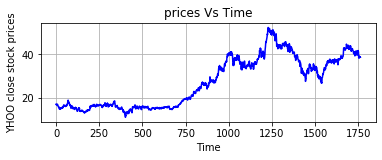

In [32]:
def plotter(code):
    global closing_stock
    plt.subplot(211)
    company_close = modified_df[modified_df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()

plotter("YHOO")

In [33]:
n_train = int(len(closing_stock) * 0.80)
n_remaining = len(closing_stock) - n_train

n_val = int(n_remaining * 0.50)
n_test = n_remaining - n_val
print("Train samples:", n_train, "Validation Samples:",n_val, "Test Samples:", n_test)

Train samples: 1411 Validation Samples: 176 Test Samples: 177


In [34]:
train_data = closing_stock[0:n_train]
print(train_data.shape)

(1411, 1)


In [35]:
val_data = closing_stock[n_train: n_train + n_val]

In [36]:
test_data = closing_stock[n_train + n_val:]

In [37]:
print(test_data.shape)

(177, 1)


In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [39]:
train = scaler.fit_transform(train_data)

In [40]:
val = scaler.transform(val_data)

In [41]:
test = scaler.transform(test_data)

In [42]:
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

In [43]:
n_features = 2

In [44]:
trainX, trainY = create_dataset(train, n_features)
valX, valY = create_dataset(val, n_features)
testX, testY = create_dataset(test, n_features)

In [45]:
print(trainX.shape, trainY.shape, valX.shape, valY.shape, testX.shape, testY.shape)

(1408, 2) (1408,) (173, 2) (173,) (174, 2) (174,)


In [46]:
trainX = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
valX = valX.reshape(valX.shape[0], 1, valX.shape[1])
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])

In [47]:
print(trainX.shape, trainY.shape, valX.shape, valY.shape, testX.shape, testY.shape)

(1408, 1, 2) (1408,) (173, 1, 2) (173,) (174, 1, 2) (174,)


In [48]:
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [49]:
model = keras.models.Sequential()

In [50]:
#First GRU layer
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1,n_features),activation='tanh'))
model.add(layers.Dropout(0.2))

#Second GRU layer
model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1, n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

#Third GRU layer
model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

#The output layer
model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

In [51]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005), metrics = ['mean_squared_error'])

/usr/local/anaconda/envs/tensorflow2/lib/python3.6/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [52]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 100)            31200     
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 150)            113400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               75600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [53]:
history = model.fit(trainX, trainY, epochs=100, batch_size=128, verbose=1, validation_data=(valX,valY))

Epoch 1/100
11/11 [==============================] - 5s 131ms/step - loss: 0.1341 - mean_squared_error: 0.1341 - val_loss: 0.0953 - val_mean_squared_error: 0.0953
Epoch 2/100
11/11 [==============================] - 0s 10ms/step - loss: 0.0387 - mean_squared_error: 0.0387 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 3/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 7.2537e-04 - val_mean_squared_error: 7.2537e-04
Epoch 4/100
11/11 [==============================] - 0s 10ms/step - loss: 0.0131 - mean_squared_error: 0.0131 - val_loss: 0.0044 - val_mean_squared_error: 0.0044
Epoch 5/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 4.9766e-04 - val_mean_squared_error: 4.9766e-04
Epoch 6/100
11/11 [==============================] - 0s 10ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 9.8298e-04 - val_mean_squared_error: 9.8298e-04
Epoch

11/11 [==============================] - 0s 10ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 4.0267e-04 - val_mean_squared_error: 4.0267e-04
Epoch 50/100
11/11 [==============================] - 0s 10ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 3.5982e-04 - val_mean_squared_error: 3.5982e-04
Epoch 51/100
11/11 [==============================] - 0s 12ms/step - loss: 0.0012 - mean_squared_error: 0.0012 - val_loss: 3.5439e-04 - val_mean_squared_error: 3.5439e-04
Epoch 52/100
11/11 [==============================] - 0s 11ms/step - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 3.6088e-04 - val_mean_squared_error: 3.6088e-04
Epoch 53/100
11/11 [==============================] - 0s 11ms/step - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 5.8256e-04 - val_mean_squared_error: 5.8256e-04
Epoch 54/100
11/11 [==============================] - 0s 11ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 3.6432e-04 - val_mean_squared_error

11/11 [==============================] - 0s 9ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 3.6808e-04 - val_mean_squared_error: 3.6808e-04
Epoch 98/100
11/11 [==============================] - 0s 9ms/step - loss: 9.6624e-04 - mean_squared_error: 9.6624e-04 - val_loss: 3.8209e-04 - val_mean_squared_error: 3.8209e-04
Epoch 99/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0010 - mean_squared_error: 0.0010 - val_loss: 3.8474e-04 - val_mean_squared_error: 3.8474e-04
Epoch 100/100
11/11 [==============================] - 0s 10ms/step - loss: 0.0011 - mean_squared_error: 0.0011 - val_loss: 3.6550e-04 - val_mean_squared_error: 3.6550e-04


In [57]:
import math

def model_score(model, X_train, y_train, X_val, y_val, X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {: .5f} , RMSE: {:.2f}".format(train_score[0], math.sqrt(train_score[0])) )
    
    print("Validation Score:")
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {:.5f}, RMSE: {:.2f}".format(val_score[0], math.sqrt(val_score[0])))
    
    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print("MSE: {:.5f}, RMSE: {:.2f}".format (test_score[0], math.sqrt(test_score[0])))
    
model_score(model, trainX, trainY, valX, valY, testX, testY)

Train Score:
MSE:  0.00018 , RMSE: 0.01
Validation Score:
MSE: 0.00037, RMSE: 0.02
Test Score:
MSE: 0.00023, RMSE: 0.02


In [60]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


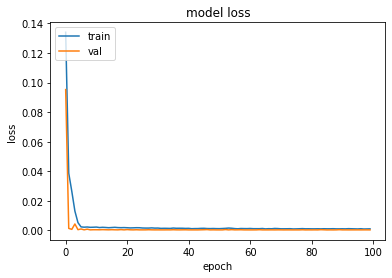

In [61]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [62]:
pred = model.predict(testX)

In [65]:
pred = scaler.inverse_transform(pred)
print(pred[:10])

[[37.652534]
 [37.42834 ]
 [37.271576]
 [37.128403]
 [36.84003 ]
 [36.735134]
 [36.691746]
 [36.32445 ]
 [36.156303]
 [36.77799 ]]


In [66]:
testY_actual = testY.reshape(testY.shape[0], 1)
testY_actual = scaler.inverse_transform(testY_actual)
print(testY_actual[:10])

[[37.23]
 [37.11]
 [36.95]
 [36.59]
 [36.6 ]
 [36.53]
 [36.01]
 [36.  ]
 [36.94]
 [37.23]]


In [ ]:
plt.plot(testY_actual, 'b')
plt.plot(pred, 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')